# BCI Comprehensive Data Alignment

# Section 1: Get epochs 

In [182]:
import mne
import numpy as np
from mne.datasets import eegbci
import matplotlib.pyplot as plt
from os import listdir
from mne.channels import make_standard_montage
from BCIAllFunction import BCIFuntions

# ['C3', 'Cz','C4','Pz','PO7','Oz','PO8']

AllBCIClass = BCIFuntions(numclass = 4, frequency = 250, ch_pick = ['Fz','C3','Cz','C4','Pz'])

target_data_0 = "voen" #this subject will be test_set otherwise are train_set
calibrate_size = 40 # (trial)
condition_wLTL = "EA"

# all_data = ["pipo","NutF8","AJpang","Aoomim","voen","pipo_HCI","Kawin"]

all_data = "all"

EEG_data = AllBCIClass.GetRawEDF(target_subjects= all_data, condition="offline") #Input data -> 250Hz with 6-32 Hz filtered + CAR

Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Offline_Experiment\pipo\notch_EDF\sess1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Offline_Experiment\pipo\notch_EDF\sess2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Offline_Experiment\pipo\notch_EDF\sess3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Offline_Experiment\NutF8\notch_EDF\sess1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Offline_Experiment\NutF8\notch_EDF\sess2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\git\Senior_The

In [183]:
EEG_Epochs = AllBCIClass.GetEpoch(EEG_data ,tmin= -2.0, tmax= 6.0, crop = (0,4) ,baseline= (-0.5,0.0), trial_removal_th = 100)
calibrate_size = calibrate_size / EEG_Epochs[target_data_0]['Raw_Epoch'].shape[0]

Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']
Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']
NutF8 -106.05944812235312 6
NutF8 87.99650203877489 6
NutF8 -107.16756444454128 11
NutF8 95.88834788874479 11
Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']


c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()
c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()


Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']
Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']


c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()
c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()


voen -1046.2804421181702 1
voen 770.6204854472528 1
voen -1123.3567266074956 2
voen 1020.5333237930538 2
voen -967.698581853632 3
voen 1242.6362166662427 3
voen -1611.1549688593639 4
voen 1049.7059316670723 4
voen -1446.2257344256857 5
voen 994.4322456002548 5
voen -1077.9496026113516 6
voen 1112.214468800871 6
voen -1112.390617843004 7
voen 1080.5652497086858 7
voen -1158.9488038188729 8
voen 1564.9368945560411 8
voen -1379.2962994765912 9
voen 1404.1244515724663 9
voen -1509.9916876778555 10
voen 1373.5847498745975 10
voen -1060.094847658285 11
voen 1252.2800997591255 11
voen -979.2778886987566 12
voen 1593.1528691100477 12
voen -1374.4040090988578 13
voen 1625.9393019868216 13
voen -1531.9294444848929 14
voen 1784.3055997815295 14
voen -1340.3352333524676 15
voen 1271.459850022828 15
voen -1316.7606198803255 16
voen 802.9105990103434 16
voen -1363.302188022031 18
voen 809.6225422289798 18
voen -638.4461100054375 19
voen 859.2827239153681 19
voen -1404.5271570870284 20
voen 852.91920

c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()


pipo_HCI -56.016061705789106 79
pipo_HCI 119.83623280859253 79
Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']


c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()
c:\git\BCI_MI_Study\BCIAllFunction.py:88: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  train_data = EEG_epoch[key_subs]['Raw_Epoch'].get_data()


In [184]:
EEG_Epochs[target_data_0]['Raw_Epoch'].shape

(88, 8, 1001)

In [185]:
calibrate_size

0.45454545454545453

# Section 2: Apply Data Alignment on RAW data

In [186]:
AllBCIClass.GetRawSet_ComputeEA(EEG_Epochs, target_subject= target_data_0, calibrate_size=calibrate_size)
if calibrate_size != 0:
    target_data = target_data_0 + "_test"

In [187]:
target_data

'voen_test'

# Section 3: vistualize raw data with and without EA

In [188]:
# if calibrate_size != 0:
#     AllBCIClass.plot_rawEA(EEG_Epochs, no_trial= 1, target_subject= target_data)

# Section 4 : CSP

In [189]:
CSP2D_Epoch = AllBCIClass.computeCSPFeatures(EEG_Epochs, target_subject = target_data)

Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8


In [190]:
CSP2D_Epoch.keys()

dict_keys(['pipo', 'NutF8', 'AJpang', 'Aoomim', 'voen', 'pipo_HCI', 'Kawin', 'voen_test'])

# Section 5 : T-SNE Plot

Processing pipo
Processing NutF8
Processing AJpang
Processing Aoomim
Processing voen
Processing pipo_HCI
Processing Kawin
Processing voen_test


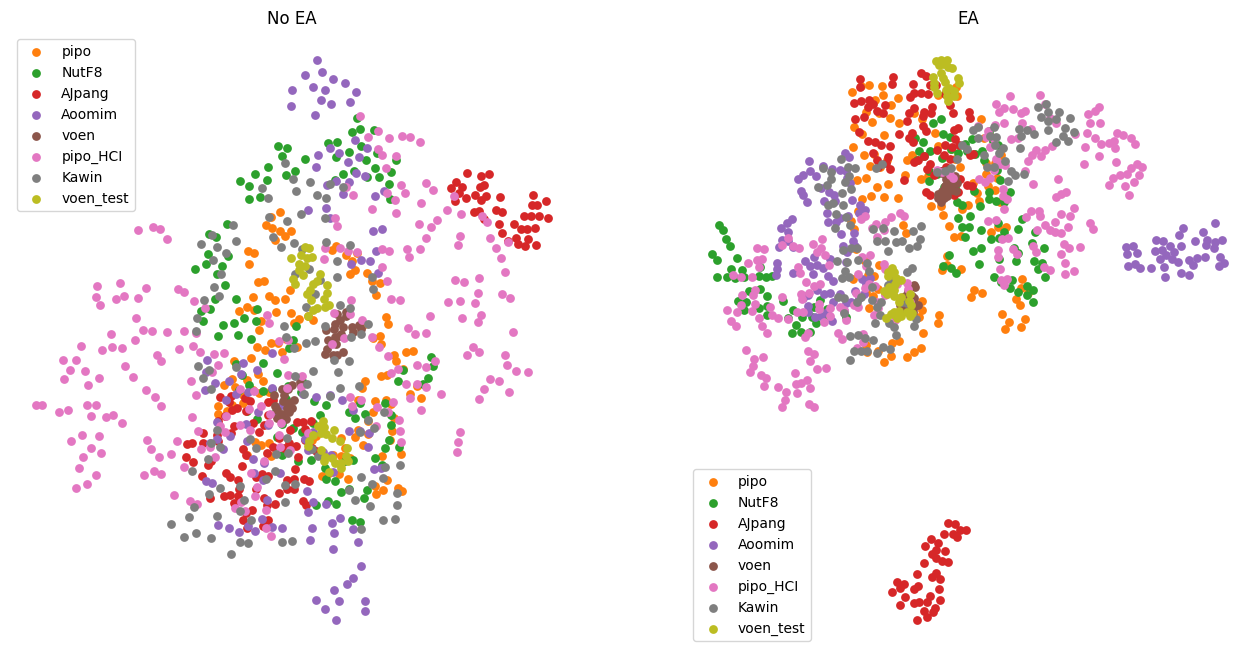

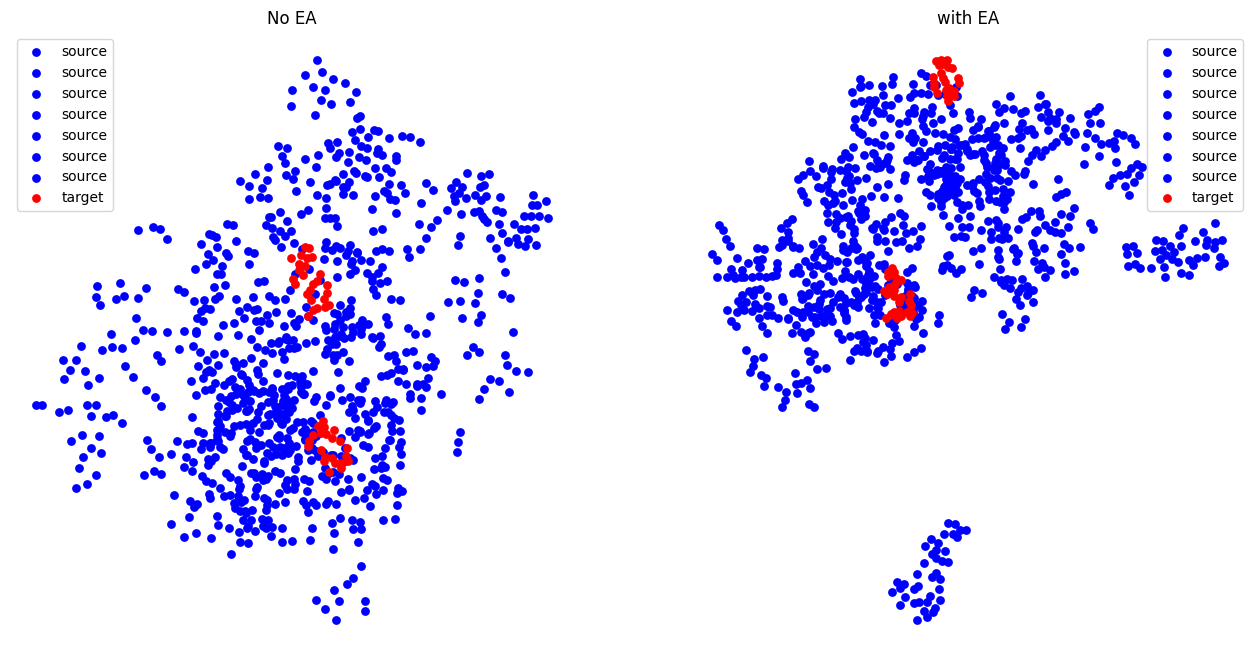

In [191]:
AllBCIClass.TSNE_Plot(CSP_Epoch= CSP2D_Epoch, target_subject= target_data)

# Section 6: Classification

# 6.1 CSP+LDA

In [192]:
AllBCIClass.classifyCSP_LDA(EEG_Epochs, target_subjects= target_data, condition = "noEA") #target_sub is used for target_data otherwise are source_data

Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
LDA only Cross-validation scores: 0.45256008359456634
Classification TRAIN DATA 
              precision    recall  f1-score   support

           0       0.49      0.59      0.54       220
           1       0.41      0.38      0.39       218
           2       0.49      0.46      0.48       219
      

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
AllBCIClass.classifyCSP_LDA(EEG_Epochs, target_subjects= target_data, condition = "EA")

Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='info'
    MAG: rank 8 after 0 projectors applied to 8 channels
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
LDA only Cross-validation scores: 0.49720480668756534
Classification TRAIN DATA 
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       220
           1       0.49      0.41      0.45       218
           2       0.51      0.50      0.51       219
      

# 6.2 CSP+SVM

In [194]:
# AllBCIClass.classifyCSP_SVM(EEG_Epochs, target_subjects= target_data, condition = "noEA")

In [195]:
# AllBCIClass.classifyCSP_SVM(EEG_Epochs, target_subjects= target_data, condition = "EA")

# 6.3 CSP+wLTL 

In [196]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Custom loss function
class CustomLossLL1(tf.keras.losses.Loss):
    def __init__(self, lambda_t, model):
        super().__init__()
        self.lambda_t = lambda_t
        self.cross_entropy = CategoricalCrossentropy()
        self.model = model

    def call(self, y_true, y_pred):
        ce_loss = self.cross_entropy(y_true, y_pred)
        ws = self.get_weights_from_model()
        reg_term = self.regularization_term(ws)
        return ce_loss + self.lambda_t * reg_term

    def get_weights_from_model(self):
        model_weights = []
        for layer in self.model.layers:
            if len(layer.get_weights()) > 0:
                model_weights.append(layer.get_weights()[0])
        # return tf.concat([tf.reshape(w, [-1]) for w in model_weights], axis=0)
        return model_weights

    def regularization_term(self, ws):
        reg_term = tf.pow(tf.norm(ws, ord='euclidean'),2)
        return reg_term


# Custom training loop
def custom_train_step(model, optimizer, x, y, custom_loss):
    with tf.GradientTape() as tape:
        y_pred = model(x, training=True) # Perform a forward pass and compute the predictions
        loss = custom_loss(y, y_pred) # Compute the custom loss
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss


def train_weight_LL(X_train, y_train, lambd, num_tier=10, learning_rate = 0.01):
    n_classes = np.unique(y_train).size
    y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)

    lambda_t = lambd  # Regularization parameter

    model = Sequential([
        Dense(n_classes, input_shape=(X_train.shape[1],), activation='softmax')  # Adjust input_shape to match the number of features in X
    ])

    # Compile the model
    optimizer = Adam(learning_rate)
    custom_loss = CustomLossLL1(lambda_t, model)

    # Custom training loop
    epochs = num_tier
    lowest_loss = float('inf')
    best_weights = None
    for epoch in range(epochs):
        loss = custom_train_step(model, optimizer, X_train, y_one_hot, custom_loss)
        loss_value = loss.numpy()
        if loss_value < lowest_loss:
            lowest_loss = loss_value
            best_weights = [layer.get_weights() for layer in model.layers]

        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy()}")

    best_weights = [layer.get_weights() for layer in model.layers]

    return best_weights, lowest_loss

def build_clf_params(data, target_subjects ,condition):

    for sub in data.keys():
        if (sub  != target_subjects) and  (sub != target_data_0): #Don't apply weight to target subject
            # Where the tranining data is stored
            if condition == "noEA":
                X = data[sub]['Raw_csp']
                y = data[sub]['Raw_csp_label']
                store_ws = 'ws_Raw'

            else:
                X = data[sub]['EA_csp']
                y = data[sub]['EA_csp_label']
                store_ws = 'ws_EA'

            weights, loss = train_weight_LL(X_train=X, y_train=y, lambd= 0.1, num_tier=500, learning_rate= 0.005)
            print("weights of ", str(sub), ": ", weights)
            print("Lowest loss of ", str(sub), ": ", loss)
            data[sub][store_ws] = weights

build_clf_params(CSP2D_Epoch, target_subjects= target_data ,condition = condition_wLTL)

Epoch 0, Loss: 2.954829454421997
Epoch 20, Loss: 2.0454115867614746
Epoch 40, Loss: 1.7458239793777466
Epoch 60, Loss: 1.6857463121414185
Epoch 80, Loss: 1.6611162424087524
Epoch 100, Loss: 1.6490557193756104
Epoch 120, Loss: 1.6463621854782104
Epoch 140, Loss: 1.6532100439071655
Epoch 160, Loss: 1.6685019731521606
Epoch 180, Loss: 1.6915366649627686
Epoch 200, Loss: 1.7215925455093384
Epoch 220, Loss: 1.758076548576355
Epoch 240, Loss: 1.8004868030548096
Epoch 260, Loss: 1.8484199047088623
Epoch 280, Loss: 1.9015504121780396
Epoch 300, Loss: 1.959613561630249
Epoch 320, Loss: 2.022387981414795
Epoch 340, Loss: 2.0896806716918945
Epoch 360, Loss: 2.1613171100616455
Epoch 380, Loss: 2.237135887145996
Epoch 400, Loss: 2.3169803619384766
Epoch 420, Loss: 2.400700569152832
Epoch 440, Loss: 2.488147258758545
Epoch 460, Loss: 2.579174041748047
Epoch 480, Loss: 2.673637866973877
weights of  pipo :  [[array([[-0.6730003 ,  0.40022886,  0.7632877 ,  0.6335815 ],
       [ 0.777131  ,  0.34380427

NOTE:
Weights (array): These are the parameters that the model learns during training. They represent the strength of the connections between neurons. The shape of the weights array is (input_dim, output_dim).

Biases (array): These are additional parameters that are added to the outputs of each layer. The shape of the biases array is (output_dim,).

In [197]:
CSP2D_Epoch[target_data].keys()

dict_keys(['Raw_csp', 'Raw_csp_label', 'EA_csp', 'EA_csp_label', 'sne', 'sne_EA'])

In [198]:
# First define the kl divergence
def KL_div(P, Q):
    # First convert to np array
    P = np.array(P)
    Q = np.array(Q)
    
    # Then compute their means, datain shape of samples x feat
    mu_P = np.mean(P, axis=0)
    mu_Q = np.mean(Q, axis=0)    

    
    # Compute their covariance
    sigma_P = np.cov(P, rowvar=False)
    sigma_Q = np.cov(Q, rowvar=False)  

    # print(mu_P, mu_Q)  

    # print(sigma_P, sigma_Q)  

    diff = mu_Q - mu_P

    inv_sigma_Q = np.linalg.inv(sigma_Q)
    term1 = np.dot(np.dot(diff.T, inv_sigma_Q), diff)
    
    # Calculate the trace term trace(Sigma_Q^{-1} * Sigma_P)
    term2 = np.trace(np.dot(inv_sigma_Q, sigma_P))
    
    # Calculate the determinant term ln(det(Sigma_P) / det(Sigma_Q))
    det_sigma0 = np.linalg.det(sigma_P)
    det_sigma1 = np.linalg.det(sigma_Q)

    # print(det_sigma0, det_sigma1)  
    
    epsilon = 1e-6
    term3 = np.log((det_sigma0+epsilon) / (det_sigma1+epsilon))

    # if np.isnan(term3):
    #     term3 = 0
    
    print(term3)
    
    # Dimensionality of the data
    K = mu_P.shape[0]
    
    # KL divergence
    kl_div = 0.5 * (term1 + term2 - term3 - K)
    
    return kl_div

In [199]:
# Compute kl divergence of target subject to each source subject
def compute_all_kl_div(data, target_subjects , condition):
    '''
    Parameter:
    data, is the whole data containing target and source data
    '''
    kl_div_score = []

    if condition == "noEA":
        target_data = 'Raw_csp'
        label_name = 'Raw_csp_label'

    else:
        target_data = 'EA_csp'
        label_name = 'EA_csp_label'
        
    # cal P from target data
    label_tgt =  data[target_subjects][label_name]
    P_left =  data[target_subjects][target_data][np.where(label_tgt == 0)]
    P_right = data[target_subjects][target_data][np.where(label_tgt == 1)]
    P_non = data[target_subjects][target_data][np.where(label_tgt == 2)]
    P_feet = data[target_subjects][target_data][np.where(label_tgt == 3)]

    tgt_data = target_subjects + "_test"

    #cal Q from each source subject
    for sub in data.keys():
        if (sub != target_subjects) and (sub != tgt_data):
            label_src =  data[sub][label_name]
            Q_left =  data[sub][target_data][np.where(label_src == 0)]
            Q_right = data[sub][target_data][np.where(label_src == 1)]
            Q_non = data[sub][target_data][np.where(label_src == 2)]
            Q_feet = data[sub][target_data][np.where(label_src == 3)]

            kl_left = KL_div(P_left, Q_left)
            kl_right = KL_div(P_right, Q_right)
            kl_non = KL_div(P_non, Q_non)
            kl_feet = KL_div(P_feet, Q_feet)

            # kl_div = (kl_left + kl_right+ kl_non + kl_feet)/4

            kl_div_temp = [kl_left, kl_right, kl_non, kl_feet]

            kl_div_score.append(kl_div_temp)

    data[target_subjects]['kl_div'] = kl_div_score


compute_all_kl_div(CSP2D_Epoch, target_subjects=target_data_0 ,condition = condition_wLTL) #target_sub for cal KL is calibrate set

-6.167431915220051e-07
-8.787535506719906e-07
-9.580666330072681e-07
-7.640808693852808e-07
-1.9080889340450735e-06
-3.2105646884183577e-06
-4.218255676480512e-06
-5.132020329969094e-07
2.4992514693199915e-09
-2.2733970187217645e-08
-1.7021966203779158e-08
-3.975498049777206e-09
-9.872961402856996e-08
-5.830270475144185e-07
-2.6399023741395735e-06
-1.2463924401809446e-06
-2.113813905914168e-06
-3.5795373883816937e-06
-2.3001800321877145e-05
-1.8264834479517095e-06
-1.9297057040436987e-06
-2.437448503429822e-06
-5.56582915106106e-07
-1.523092765742499e-06


In [200]:
np.array(CSP2D_Epoch[target_data_0]['kl_div'])

array([[ 9.33157417,  2.00122747,  4.56044384,  6.10558316],
       [27.83042862, 15.59784702, 13.77128623, 15.4276627 ],
       [15.94241828,  9.26521479, 11.19086927, 12.83122638],
       [ 6.43970721,  3.42887913,  0.6539533 ,  5.60982623],
       [ 2.35183417,  1.65669844,  0.03484091,  2.34647569],
       [ 3.9286355 ,  4.13598043,  7.05654991,  5.95312489]])

In [201]:
def compute_similarity_weights(data, target_subjects):
    kl = data[target_subjects]['kl_div']
    KL_inv_left = []
    KL_inv_right = []
    KL_inv_non = []
    KL_inv_feet = []

    alpha_s = []
    eps = 0.0001
    
    #equation (9)
    for val in kl:
        if val != 0: 
            KL_inv_left.append(1/((val[0] + eps)**4))
            KL_inv_right.append(1/((val[1] + eps)**4))
            KL_inv_non.append(1/((val[2] + eps)**4))
            KL_inv_feet.append(1/((val[3] + eps)**4))

    print(KL_inv_left)
    print(KL_inv_right)
    
    for i in range(0,len(KL_inv_left)):
        temp = [KL_inv_left[i]/sum(KL_inv_left), KL_inv_right[i]/sum(KL_inv_right), KL_inv_non[i]/sum(KL_inv_non), KL_inv_feet[i]/sum(KL_inv_feet)]
        alpha_s.append(temp)

    # for inv_val in KL_inv:
    #     temp = inv_val/sum(KL_inv)    
    #     alpha_s.append(temp)

    print(np.array(alpha_s))
                
    data[target_subjects]['alpha_s'] = alpha_s

compute_similarity_weights(CSP2D_Epoch, target_subjects=target_data_0)

[0.00013187477578940681, 1.6669177754081457e-06, 1.5480048092602757e-05, 0.0005814448592570395, 0.03268130235051379, 0.004197481948538775]
[0.06233434171876543, 1.6893912337267676e-05, 0.00013569357480280867, 0.007233369178562655, 0.1327153898146492, 0.003416993056807591]
[[3.50644516e-03 3.02810444e-01 3.44561379e-09 2.02344902e-02]
 [4.43220148e-05 8.20679732e-05 4.14402629e-11 4.96383710e-04]
 [4.11602138e-04 6.59178078e-04 9.50303489e-11 1.03739252e-03]
 [1.54601553e-02 3.51385716e-02 8.14480273e-06 2.83923094e-02]
 [8.68969777e-01 6.44710523e-01 9.99991851e-01 9.27451173e-01]
 [1.11607699e-01 1.65992157e-02 6.01089093e-10 2.23882510e-02]]


In [202]:
def compute_ETL_and_mu_ws(data, target_subjects, condition):

    mu_ws = 0
    temp_ws = 0

    if condition == "noEA":
        ws_name = 'ws_Raw'
    else:
        ws_name = 'ws_EA'

    alpha_s = np.array(data[target_subjects]['alpha_s'])

    tgt_data = target_subjects + "_test"
    index_count = 0

    for sub in data.keys():
        if (sub != target_subjects) and (sub != tgt_data):
            ws = data[sub][ws_name][0][0]
            # mu_ws += ws @ alpha_s  #equation (10)
            # mu_ws += np.dot(ws, np.transpose(alpha_s))
            mu_ws += ws * alpha_s[index_count]
            index_count += 1

    print(np.array(mu_ws))

    index_count = 0
    for sub in data.keys():
        if (sub != target_subjects) and (sub != tgt_data):
            ws = data[sub][ws_name][0][0]
            # ws_min_mu = np.dot((np.dot(ws,np.transpose(alpha_s)) - mu_ws) , np.transpose((np.dot(ws,np.transpose(alpha_s)) - mu_ws)))
            ws_min_mu = np.dot(((ws * alpha_s[index_count]) - mu_ws), np.transpose((ws * alpha_s[index_count]) - mu_ws))
            temp_ws += ws_min_mu #equation (11)
            index_count += 1

    print(np.array(temp_ws))
    
    # den = np.diag(temp_ws) #get array in diagonal line

    den = temp_ws
    nom = np.trace(temp_ws) #Return the sum along diagonals of the array.
    Sigma_TL = den/nom


    data[target_subjects]['Sigma_TL'] = Sigma_TL
    data[target_subjects]['mu_ws'] = mu_ws

compute_ETL_and_mu_ws(CSP2D_Epoch, target_subjects = target_data_0, condition=condition_wLTL)

[[-0.88680336  0.39920947 -0.03677571  0.55587961]
 [ 1.17014414  0.35753029  0.14707682 -0.24086368]
 [-0.35044256 -0.70578495 -0.01902044 -0.16692765]
 [ 0.00458924  0.39767282 -0.47367761  0.85119434]
 [ 0.05152179 -0.76706922 -0.48766369  0.36182165]
 [-0.18000591  0.07014326  0.15614137 -1.19016665]
 [ 0.14080936  0.01470196  0.233874   -0.88582542]
 [-0.1332332  -0.05007463  0.02201597  0.05938134]]
[[ 5.9945188  -5.01154477 -0.25666562  3.12254357 -0.48316643 -2.39608249
  -3.08845601  0.63993887]
 [-5.01154477  7.63582872 -2.91519585 -0.66747718 -1.76930699  0.58851134
   2.05111912 -0.88922981]
 [-0.25666562 -2.91519585  2.96447176 -1.93637935  2.10189243  1.05022644
   0.42957014  0.33417313]
 [ 3.12254357 -0.66747718 -1.93637935  5.4072326   1.32292449 -5.26215552
  -4.25142652  0.10128351]
 [-0.48316643 -1.76930699  2.10189243  1.32292449  4.5436624  -2.87458865
  -2.18758247  0.19219595]
 [-2.39608249  0.58851134  1.05022644 -5.26215552 -2.87458865  7.40964653
   5.2797316

In [203]:
print(np.array(CSP2D_Epoch[target_data_0]['Sigma_TL']).shape)
print(np.array(CSP2D_Epoch[target_data_0]['mu_ws']).shape)

(8, 8)
(8, 4)


# Test ACC with target subject

In [204]:
# Custom loss function
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class CustomLossLL2(tf.keras.losses.Loss):
    def __init__(self, lambda_t, model, mu, sigma_TL):
        super().__init__()
        self.lambda_t = lambda_t
        self.cross_entropy = CategoricalCrossentropy()
        self.model = model
        self.mu = tf.convert_to_tensor(mu, dtype=tf.float32)
        self.sigma_TL = tf.convert_to_tensor(sigma_TL, dtype=tf.float32)

    def call(self, y_true, y_pred):
        ce_loss = self.cross_entropy(y_true, y_pred)
        wt = self.get_weights_from_model()
        reg_term = self.regularization_term(wt)

        return ce_loss + (self.lambda_t * tf.linalg.matmul(reg_term, wt))

    def get_weights_from_model(self):
        model_weights = []
        for layer in self.model.layers:
            if len(layer.get_weights()) > 0:
                model_weights.append(layer.get_weights()[0])
        # return tf.concat([tf.reshape(w, [-1]) for w in model_weights], axis=0)
        return model_weights

    def regularization_term(self, wt):
        diff = wt - self.mu
        reg_term = 0.5 * tf.linalg.matmul(tf.linalg.matmul(tf.linalg.inv(self.sigma_TL), diff[0]), tf.transpose(diff[0]))
        reg_term += 0.5 * tf.math.log(tf.linalg.det(self.sigma_TL))
        return reg_term


# Custom training loop
def custom_train_step(model, optimizer, x, y, custom_loss):
    with tf.GradientTape() as tape:
        y_pred = model(x, training=True) # Perform a forward pass and compute the predictions
        loss = custom_loss(y, y_pred) # Compute the custom loss
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss


def train_weight_LL2(X_train, y_train, lambd, mu, sigma_TL, num_tier=10, learning_rate = 0.01):
    n_classes = np.unique(y_train).size
    y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)

    lambda_t = lambd  # Regularization parameter

    model = Sequential([
        Dense(n_classes, input_shape=(X_train.shape[1],), activation='softmax')  # Adjust input_shape to match the number of features in X
    ])

    # Compile the model
    optimizer = Adam(learning_rate)
    custom_loss = CustomLossLL2(lambda_t, model, mu, sigma_TL)

    # Custom training loop
    epochs = num_tier
    lowest_loss = float('inf')
    best_weights = None

    for epoch in range(epochs):
        loss = custom_train_step(model, optimizer, X_train, y_one_hot, custom_loss)
        loss_value = loss.numpy()
        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy()}")

        if (loss_value < lowest_loss):
            lowest_loss = loss_value
            best_weights = [layer.get_weights() for layer in model.layers]

    # Set the model to the best weights
    # for layer, weights in zip(model.layers, best_weights):
    #     layer.set_weights(weights)

    return model, best_weights, lowest_loss

def GetConfusionMatrix(model, X_train, X_test, y_train, y_test):
    y_pred_prob = model.predict(X_train)
    y_pred = np.argmax(y_pred_prob, axis=1)

    print("Classification TRAIN DATA \n=======================")
    print(classification_report(y_true= y_train, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true= y_train, y_pred=y_pred))

    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    print("Classification TEST DATA \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))


def tgt_test_wLTL(data, target_subjects ,condition):
        tgt_data = target_subjects + "_test"

        if condition == "noEA":
            X = data[target_subjects]['Raw_csp']
            y = data[target_subjects]['Raw_csp_label']
            X_test = data[tgt_data]['Raw_csp']
            y_test = data[tgt_data]['Raw_csp_label']
            store_ws = 'wt_Raw'

        else:
            X = data[target_subjects]['EA_csp']
            y = data[target_subjects]['EA_csp_label']
            X_test = data[tgt_data]['EA_csp']
            y_test = data[tgt_data]['EA_csp_label']
            store_ws = 'wt_EA'

        mu = data[target_subjects]['mu_ws']
        sigma_TL = data[target_subjects]['Sigma_TL']

        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42, stratify=y)

        X_train = X
        y_train = y
        
        model, weights, loss = train_weight_LL2(X_train=X_train, y_train=y_train, mu =mu, sigma_TL=sigma_TL,  lambd= 0.1, num_tier=2000, learning_rate= 0.01)
        print("weights of ", str(target_subjects), ": ", weights)
        print("loss of ", str(target_subjects), ": ", loss)
        data[target_subjects][store_ws] = weights

        GetConfusionMatrix(model, X_train, X_test, y_train, y_test)

tgt_test_wLTL(CSP2D_Epoch, target_subjects= target_data_0 ,condition = condition_wLTL)

Epoch 0, Loss: -1225.907470703125
Epoch 20, Loss: -1229.72998046875
Epoch 40, Loss: -984.5999755859375
Epoch 60, Loss: -801.7470703125
Epoch 80, Loss: -648.64599609375
Epoch 100, Loss: -522.4830322265625
Epoch 120, Loss: -421.61614990234375
Epoch 140, Loss: -340.92120361328125
Epoch 160, Loss: -275.2021179199219
Epoch 180, Loss: -221.4451904296875
Epoch 200, Loss: -178.87039184570312
Epoch 220, Loss: -148.05563354492188
Epoch 240, Loss: -130.1395263671875
Epoch 260, Loss: -126.41012573242188
Epoch 280, Loss: -138.12574768066406
Epoch 300, Loss: -166.390869140625
Epoch 320, Loss: -212.0705108642578
Epoch 340, Loss: -275.75
Epoch 360, Loss: -357.72119140625
Epoch 380, Loss: -457.9936828613281
Epoch 400, Loss: -576.3067016601562
Epoch 420, Loss: -712.18017578125
Epoch 440, Loss: -864.9523315429688
Epoch 460, Loss: -1033.8282470703125
Epoch 480, Loss: -1217.920166015625
Epoch 500, Loss: -1416.2972412109375
Epoch 520, Loss: -1628.00341796875
Epoch 540, Loss: -1852.103271484375
Epoch 560, Lo